<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2023/blob/main/Classification_Recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# --- UNDER CONSTRUCTION! ---

# TO DO
* GNB?  Guess I don't need to grid search...  Show how to use pipe w.o grid
* Linear models?  At least SVM
* Include some sample reports like classification report and confusion matrix

**Dr. Daugherity, PHYS 453, Spring 2023**

# Classification Recipe
This notebook will give you basic outline for classification using best practices and more advanced tools from sklearn.    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Common utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier

# Data Set
In most machine learning problems with real-world data you can expect to spend >80% of your time on the project just dealing with the data sets.  I'm not going to cover cleaning and feature engineering here, but here are some issues to consider. 

See Tutorial 10 for some more examples of all of these steps. 

## Loading Data  
See the data loading utilities in the User's Guide here: https://scikit-learn.org/stable/datasets.html.  Common options:
* Pandas:  [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), etc.  More options [here](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)
* openml repository: [sklearn.datasets.fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml)
* Generated: use [sklearn generators](https://scikit-learn.org/stable/datasets/sample_generators.html) to follow my Golden Rule of Computing you should play with some data where you know the right answer  

In this notebook I'll assume we are starting with a Pandas dataframe.


## Cleaning Data
* Missing Data:
  * Pandas tools like [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) and [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna).  See [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) for more
  * sklearn can [impute missing values](https://scikit-learn.org/stable/modules/impute.html#impute) using tools like [SimpleInputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

* Making Numerical Features:
  * sklearn can [encode categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) using [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) and [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) 
  * pandas similar functions are [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html#pandas.factorize) and   [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), see more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-dummies) 
  * sklearn also has special tools for extracting features from [text](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) and [images](https://scikit-learn.org/stable/modules/feature_extraction.html#image-feature-extraction)  

## Plotting Data 
Make sure you understand the data you've got.  If you don't have too many features, it can be helpful to [make plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). This step is sometimes called expolatory data analysis (EDA). 




## Load Dataframe
A quick example of loading and exploring a pandas dataframe.

In [ ]:
iris_data = datasets.load_iris(as_frame=True)

In [ ]:
df = iris_data['frame'] 
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Check Dataframe

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.dtypes  # check for non-numeric columns

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [ ]:
print('Number of NaN/null values:')
pd.isna(df).sum()

Number of NaN/null values:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

This dataset is pre-cleaned.  Everything is numeric and there are no missing values, so we can proceed.

## Convert to numpy
As of now, most of sklearn's classes can accept either numpy arrays or dataframes as input, so this step may not be necessary.   

In [ ]:
y = df['target'].to_numpy()

In [ ]:
# Here's two ways to select which columns we want
# OPTION 1:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']  # copied-and-pasted from df.columns
X = df[features].to_numpy()

# OPTION 2: ILOC
X = df.iloc[:,0:4].to_numpy() # select columns 0-3

# Preprocess Data
Prepare the data for the classifier.



## Test/Train Split
Now we split data intro train and test subsets.  **IT IS IMPORTANT TO DO THIS FIRST** before any other operations take place.  I recommend reading through the [common pitfalls](https://scikit-learn.org/stable/common_pitfalls.html) for more insights and discussion.
* only call fit on X_train
* only use X_test to evaulate the final accuracy

Use `stratify=y` to ensure proportional numbers of each target go to each set.

One important clarification: when we tell GridSearchCV to fit X_train, it tunes parameters by further splitting X_train into pieces to make training and [validation](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets) sets.  When we look at GridSearchCV "*test*" scores we are actually looking at portion of X_train, so it is best to call this the validation set.  We never let grid search see X_test until the final evaluation. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2,stratify=y)

In [ ]:
print('Train\t',X_train.shape)
print('Test\t',X_test.shape)

Train	 (120, 4)
Test	 (30, 4)


## Pipeline
The next steps will happen inside a [pipeline](https://scikit-learn.org/stable/modules/compose.html).  We need to scale the data (and possibly transform it in other exciting ways), and setting up a pipeline ensures that we will treat the test and train sets exactly the same way. See a simple example of pipeline usage [here](https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py).



Remember that it is vital (for most classifiers) to scale the data first.  The other steps are optional and problem-specific. 
* (required) Scaling: use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler), or [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler);  see the [User's Guide here](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) 
* (optional): other transforms like dimensionality reduction using [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

The last step in the pipeline will be the classifier. It is easier to make the pipeline all at once, so we'll do the pipeline code along with the classifiers below.




# Helper Functions
Define some utilities to help us out

In [ ]:
# These functions visualize results from a parameter grid search. 

def make_grid_plot_labels(grid_clf):
  # Turns a parameter dictionary entry into a single string.  Not elegant.  
  res = grid_clf.cv_results_  
  NUM_KEYS = len(res['params'][0].values())
  labels = []
  for item in res['params']:
    s = ""
    for val in item.values():
      s+= str(val)
      s+='_'
    labels.append(s[:-1])
  return labels

def make_grid_plot(grid_clf):
  # Displays the scores for every set of parameters
  res = grid_clf.cv_results_  
  plt.figure(figsize=(8,4))
  plt.axvline(grid_clf.best_index_, color='black', lw=2) # draw black line behind best params
  plt.plot(res['mean_test_score'],'-o', label='Validaiton')
  plt.plot(res['mean_train_score'],'-s', label='Train')
  plt.title('Grid CV Results')
  plt.ylabel('Mean Test Score')
  NUM_KEYS = len(res['params'])
  labels = make_grid_plot_labels(grid_clf)
  plt.xticks(ticks = np.arange(NUM_KEYS), labels=labels, rotation=90)
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
scores = dict()  # set up a variable to store the final scores

# Nearest Neighbors

Notes:
* the training score is also 100% for k=1
* increase k to a large enough value that you see a peak in the test scores

Grid Parameters: {'clf__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'clf__weights': ('distance', 'uniform')}
Best parameters: {'clf__n_neighbors': 6, 'clf__weights': 'uniform'}
Best Train Score:	0.956
Grid Test SCORE:	0.947


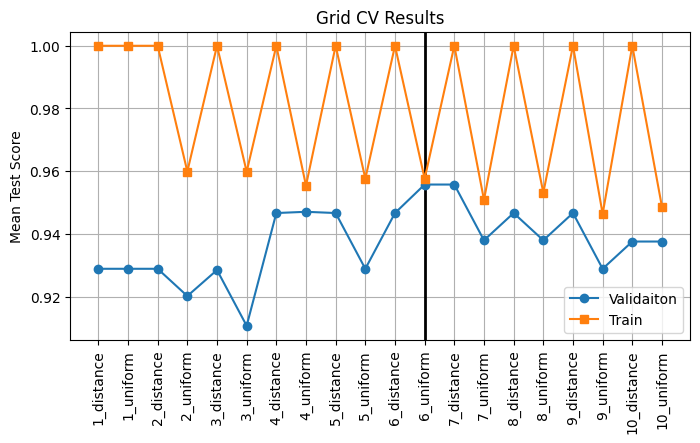

In [ ]:
# Define Pipeline
estimators = [('scaler', StandardScaler()), ('clf', KNeighborsClassifier()) ]
pipe = Pipeline(estimators)

# Grid Search Parameters
params = {'clf__n_neighbors':np.arange(1,11), 'clf__weights':('distance','uniform')}
print('Grid Parameters:',params)

grid_clf = GridSearchCV(pipe, param_grid=params, return_train_score=True)
grid_clf.fit(X_train, y_train)

print('Best parameters:', grid_clf.best_params_)
print(f"Best Train Score:\t{grid_clf.best_score_:0.3f}")
print(f"Grid Test SCORE:\t{grid_clf.score(X_test,y_test):0.3f}")

make_grid_plot(grid_clf) # Plot the results

scores['KNeighbors'] = grid_clf.score(X_test,y_test)

# Decision Tree

Notes:
* The tree's performance is not affected by scaling the data.  If you want to make tree plots later, then you can just use **UN**scaled data for the tree.
* Increase max_depth until the train score is 1.00, this is the tree's true maximum depth and there is no point in going any higher
* In event of a tie when choosing features for the next split it will make a random choice.  Set `random_state` if you want consistent behavior

Grid Parameters: {'clf__max_depth': array([1, 2, 3, 4, 5, 6, 7])}
Best parameters: {'clf__max_depth': 2}
Best Train Score:	0.958
Grid Test SCORE:	0.933


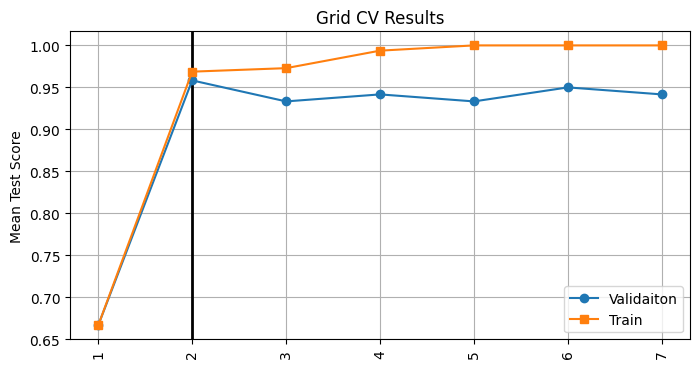

In [ ]:
# Define Pipeline
estimators = [('scaler', StandardScaler()), ('clf', DecisionTreeClassifier()) ]
pipe = Pipeline(estimators)

# Grid Search Parameters
params = {'clf__max_depth':np.arange(1,8)}
print('Grid Parameters:',params)

grid_clf = GridSearchCV(pipe, param_grid=params, return_train_score=True)
grid_clf.fit(X_train, y_train)

print('Best parameters:', grid_clf.best_params_)
print(f"Best Train Score:\t{grid_clf.best_score_:0.3f}")
print(f"Grid Test SCORE:\t{grid_clf.score(X_test,y_test):0.3f}")

make_grid_plot(grid_clf) # Plot the results

scores['DecisionTree'] = grid_clf.score(X_test,y_test)

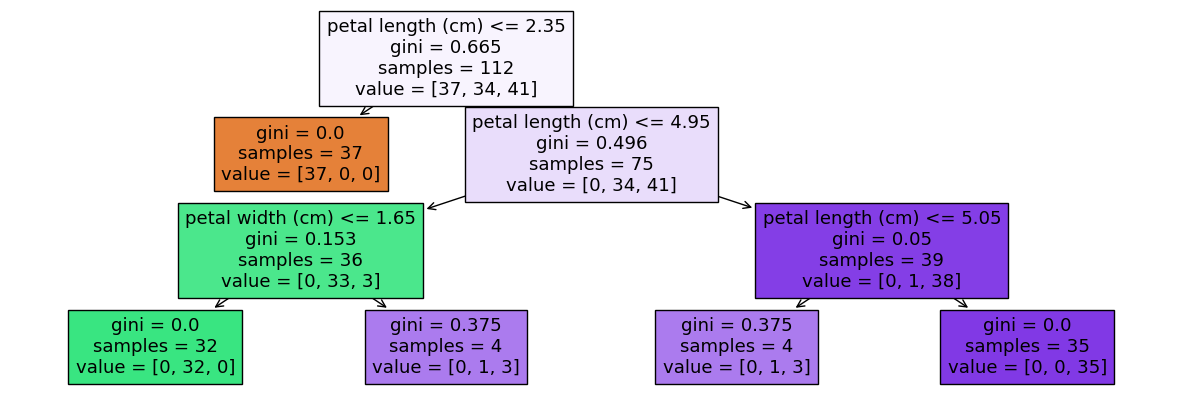

In [ ]:
# To get the classifier from the grid use this:
#clf = grid_clf.best_estimator_[-1] # best_estimator returns a pipeline, the last step is the classifier

# To train a new unscaled tree you can use this:
clf = DecisionTreeClassifier(max_depth = grid_clf.best_params_['clf__max_depth'])
clf.fit(X_train,y_train)

plt.figure(figsize=(15,5))
plot_tree(clf, filled=True, feature_names=features)
plt.show()

# Neural Network

Notes:
* Each run starts with **random** weights.  Remove random_state if you want different results every time
* Ideally you will have 5-10 training samples per weight.  So for a single hidden layer the number of features times the number of hidden nodes should not exceed 20% of the number of training samples.  Here we have 4 features and 120 samples,  so we can't expect reliable results for much more than 20 nodes
* Adding parameter options makes the grid search **EXPONENTIALLY** longer.  Start with just hidden nodes to narrow down a range, then add activation function or others
* To suppress warnings add this code above the grid search (make sure to indent):
```
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
```



Grid Parameters: {'clf__hidden_layer_sizes': [5, 10, (3, 3), (4, 4)], 'clf__activation': ['tanh', 'relu']}
Best parameters: {'clf__activation': 'relu', 'clf__hidden_layer_sizes': (3, 3)}
Best Train Score:	0.975
Grid Test SCORE:	1.000


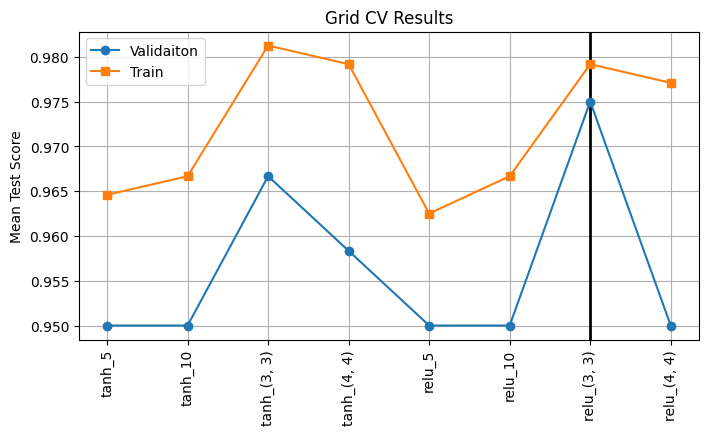

In [ ]:
# Define Pipeline
estimators = [('scaler', StandardScaler()), ('clf', MLPClassifier(max_iter=2000, random_state=0)) ]
pipe = Pipeline(estimators)

# Grid Search Parameters
#params = {'clf__hidden_layer_sizes': np.arange(2,10)}   # start with something like this for single layer
#params = {'clf__hidden_layer_sizes': [(4),(6),(8),(10),(2,2),(3,3),(4,4)]}   # 2 layer example
params = {'clf__hidden_layer_sizes': [(5),(10),(3,3),(4,4)],  'clf__activation': ['tanh', 'relu'] } # varying activation functions  
print('Grid Parameters:',params)

grid_clf = GridSearchCV(pipe, param_grid=params, return_train_score=True)
grid_clf.fit(X_train, y_train)

print('Best parameters:', grid_clf.best_params_)
print(f"Best Train Score:\t{grid_clf.best_score_:0.3f}")
print(f"Grid Test SCORE:\t{grid_clf.score(X_test,y_test):0.3f}")

make_grid_plot(grid_clf) # Plot the results

scores['NeuralNetwork'] = grid_clf.score(X_test,y_test)

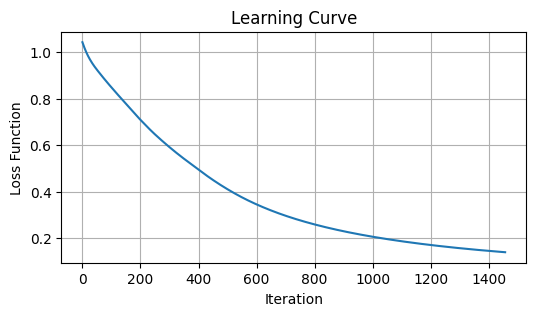

In [ ]:
plt.figure(figsize=(6,3))
clf = grid_clf.best_estimator_[-1]
plt.plot(clf.loss_curve_)
plt.ylabel('Loss Function')
plt.xlabel('Iteration')
plt.title('Learning Curve')
plt.grid()
plt.show()

# Final Summary

In [ ]:
print('Test Scores:')
for k,v in scores.items():
  print(f"{k}\t{v:0.3f}")

Test Scores:
KNeighbors	0.947
DecisionTree	0.933
NeuralNetwork	1.000
